In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.drop_duplicates()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 6 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             539 non-null    int64
 1   area              539 non-null    int64
 2   bedrooms          539 non-null    int64
 3   bathrooms         539 non-null    int64
 4   stories           539 non-null    int64
 5   mainroad          539 non-null    int64
 6   guestroom         539 non-null    int64
 7   basement          539 non-null    int64
 8   hotwaterheating   539 non-null    int64
 9   airconditioning   539 non-null    int64
 10  parking           539 non-null    int64
 11  prefarea          539 non-null    int64
 12  furnishingstatus  539 non-null    int64
dtypes: int64(13)
memory usage: 59.0 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['mainroad']=encoder.fit_transform(df['mainroad'])
df['guestroom']=encoder.fit_transform(df['guestroom'])
df['basement']=encoder.fit_transform(df['basement'])
df['hotwaterheating']=encoder.fit_transform(df['hotwaterheating'])
df['airconditioning']=encoder.fit_transform(df['airconditioning'])
df['prefarea']=encoder.fit_transform(df['prefarea'])
df['furnishingstatus']=encoder.fit_transform(df['furnishingstatus'])

<Axes: ylabel='price'>

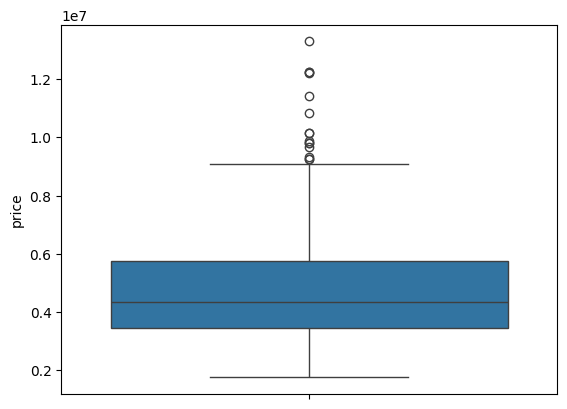

In [ ]:
sns.boxplot(df['price'])

<Axes: ylabel='price'>

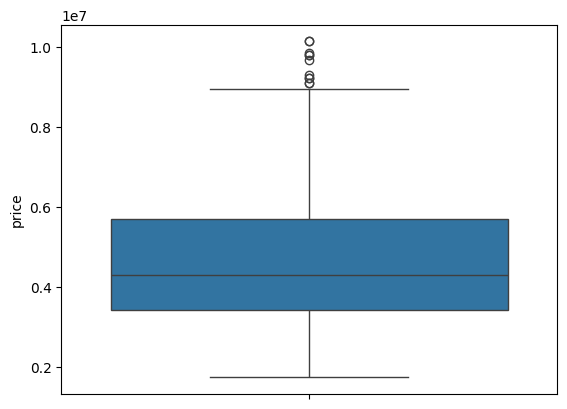

In [ ]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['price'])) < 3)]
sns.boxplot(df['price'])

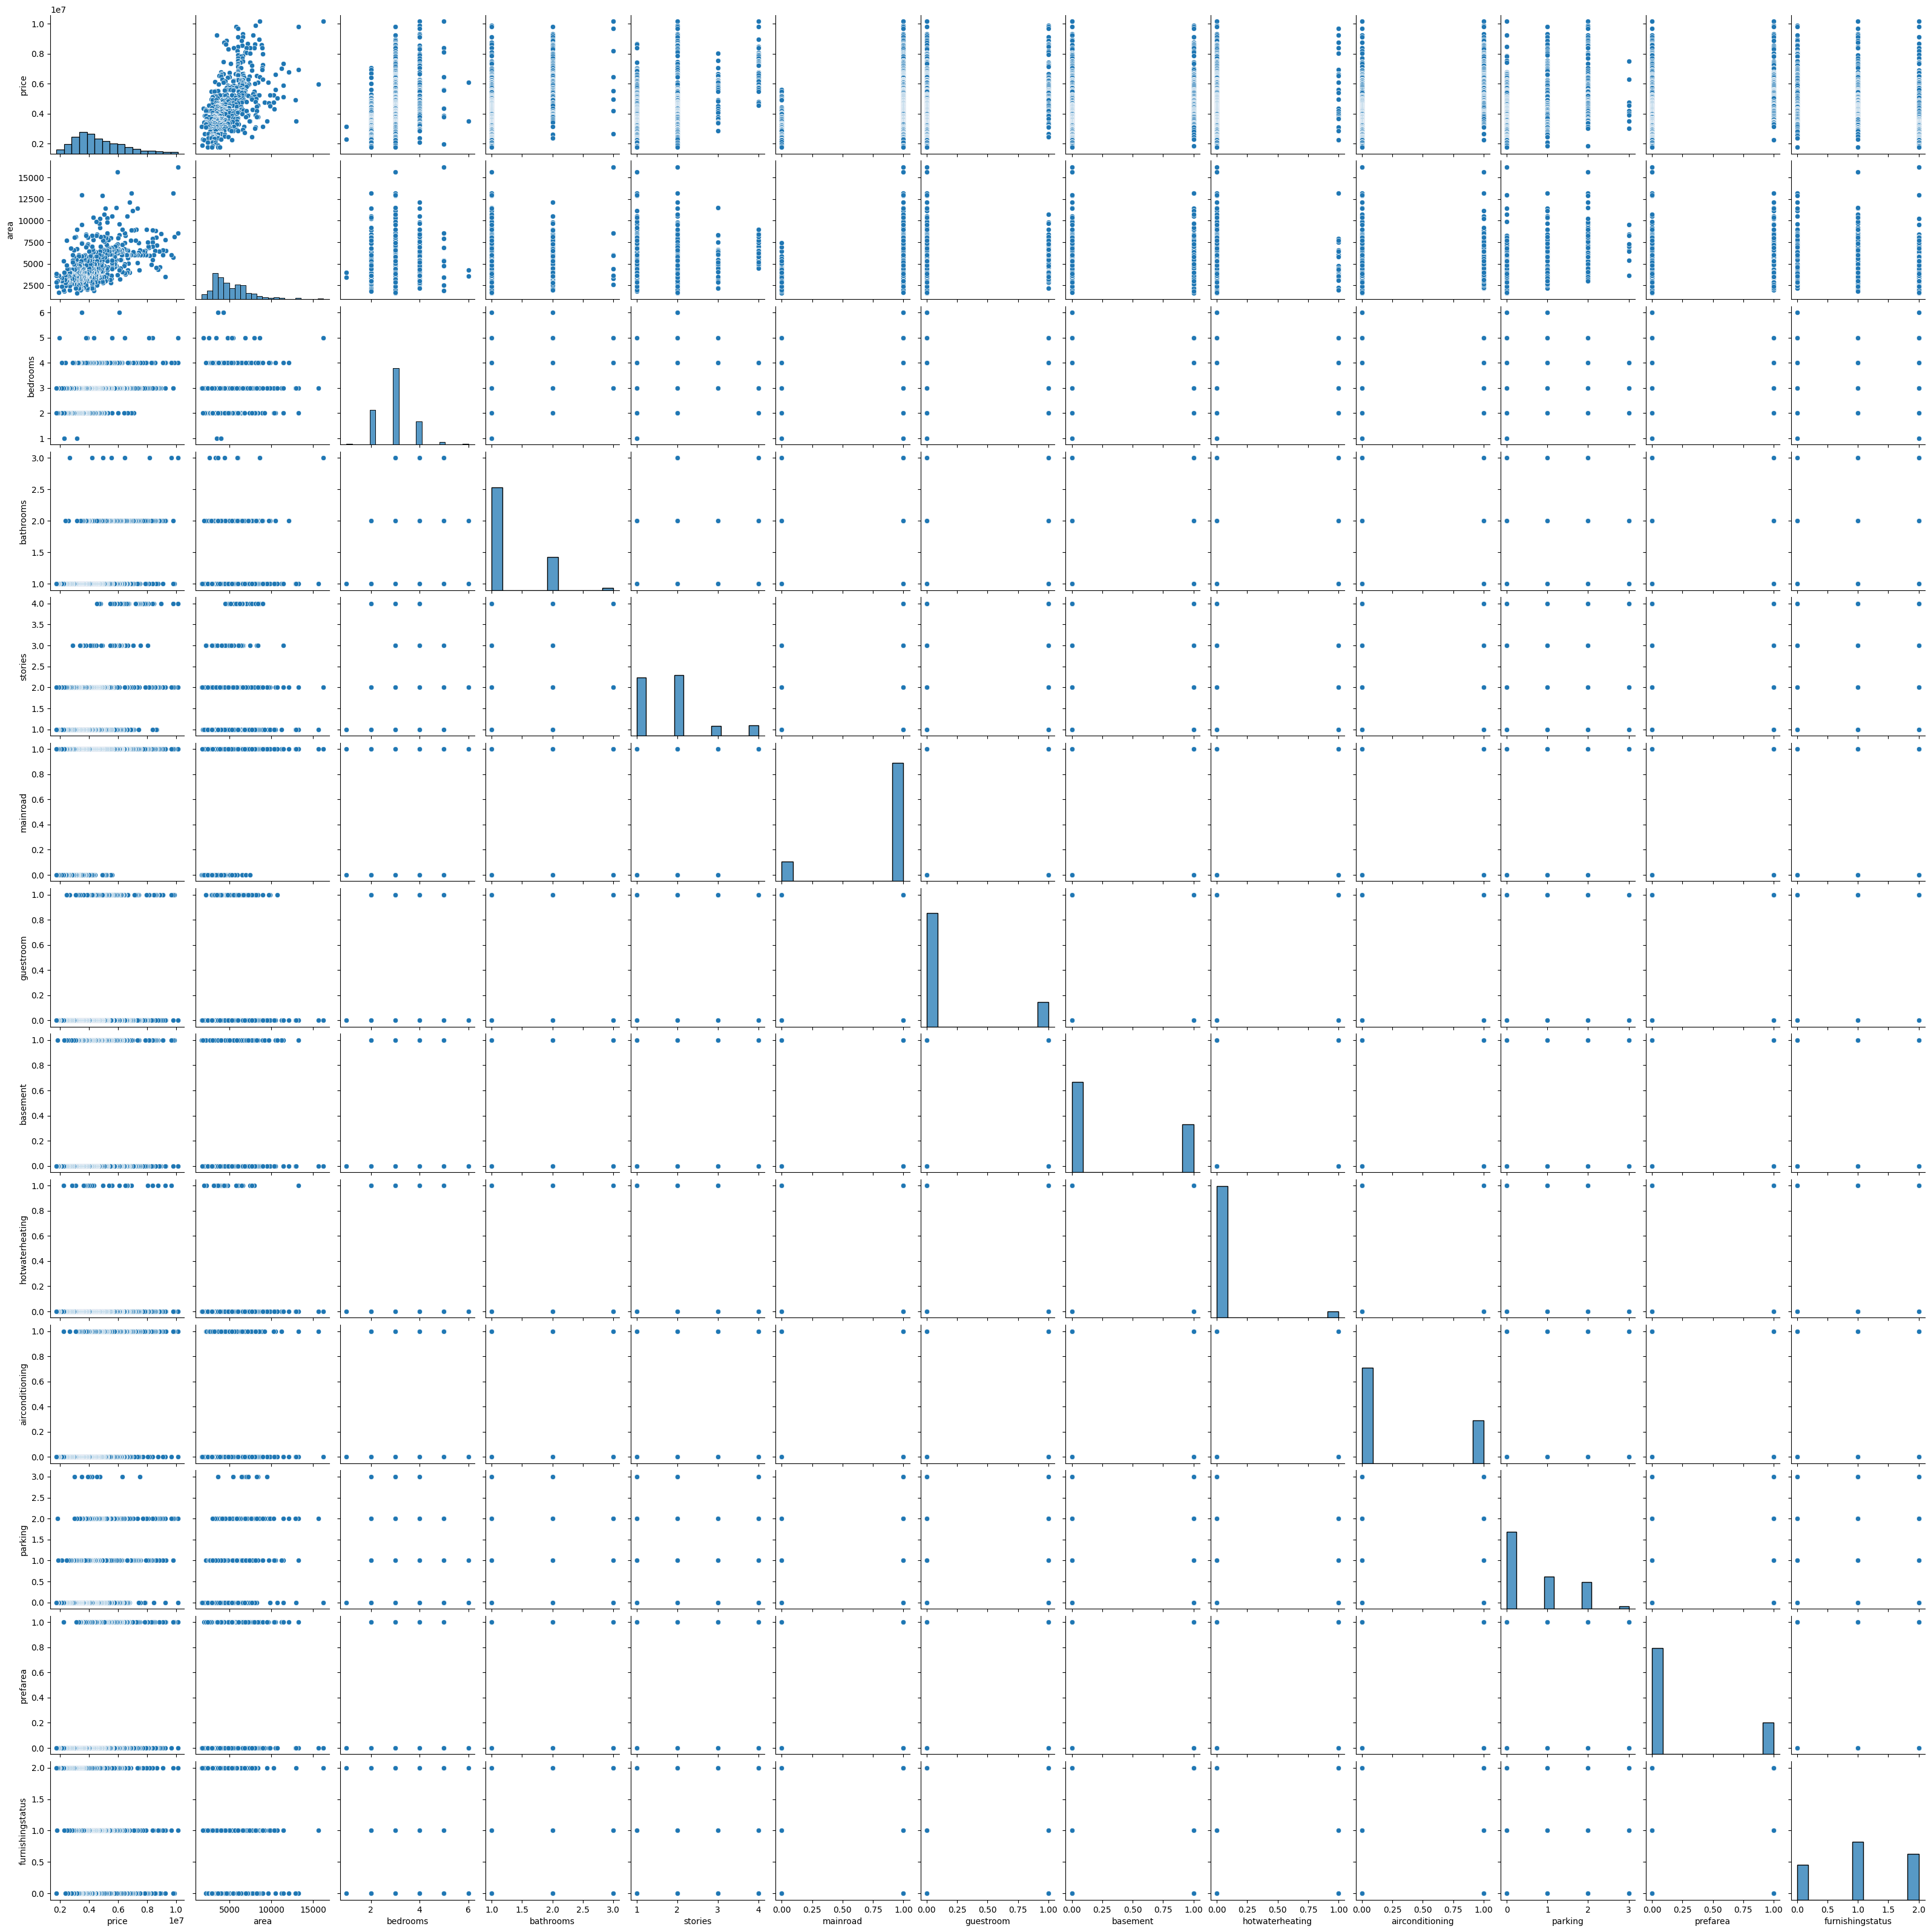

In [ ]:
sns.pairplot(df)

<Axes: >

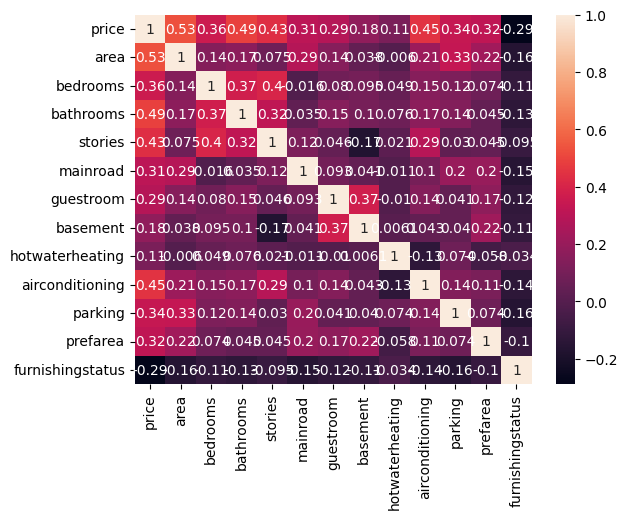

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
prediction=model.predict(x_test)
prediction

array([5870417.701795  , 3146448.4682376 , 9299365.42615428,
       7190084.6216892 , 6764827.96568169, 3883578.6481913 ,
       3818096.59556928, 2967777.02929543, 6155376.24400291,
       5144958.67455412, 8873761.09731151, 4672636.07054146,
       4791502.48079472, 7152657.33966655, 4899477.76388102,
       5570494.91699313, 4573738.30675579, 2912415.75204931,
       3157387.31648499, 4478464.28690353, 4325351.68130291,
       6663036.67231019, 5886337.62148457, 5964821.22111735,
       4114669.63984591, 6399314.8735634 , 4144579.80896948,
       5531655.26469028, 4245507.97135462, 3176664.17507882,
       4761268.42385612, 3067688.26032896, 6990483.36669569,
       3225719.51969755, 3020442.71508772, 3178466.66442326,
       3759974.48728885, 4412722.60318451, 2224476.06971073,
       5472743.98393043, 3503938.35726604, 4775170.46888113,
       2644331.17955005, 2832532.134536  , 5813467.86096273,
       5584149.1368266 , 4762636.67746107, 3683998.52966991,
       5775268.0243464 ,

In [ ]:
y_test

,price
22,8645000
536,1960000
6,10150000
77,6650000
175,5250000
...,...
517,2450000
146,5600000
10,9800000
391,3500000


In [ ]:
coe_df=pd.DataFrame(model.coef_,x.columns,columns=['coefficient'])
coe_df

,coefficient
area,496596.018585
bedrooms,93992.241284
bathrooms,455467.172323
stories,378461.646967
mainroad,167008.586651
guestroom,148997.215527
basement,112981.797683
hotwaterheating,198857.337090
airconditioning,348028.650473
parking,123011.063600


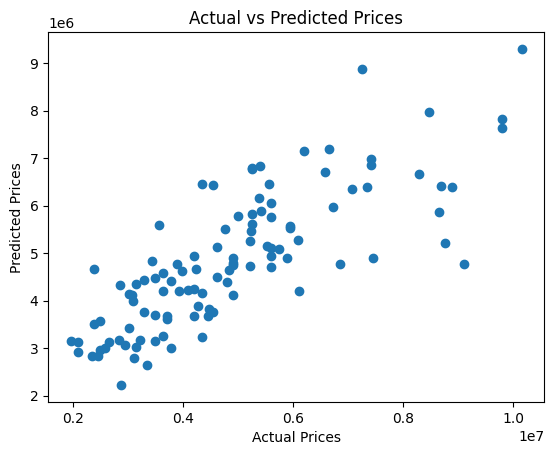

In [ ]:
plt.scatter(y_test, prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

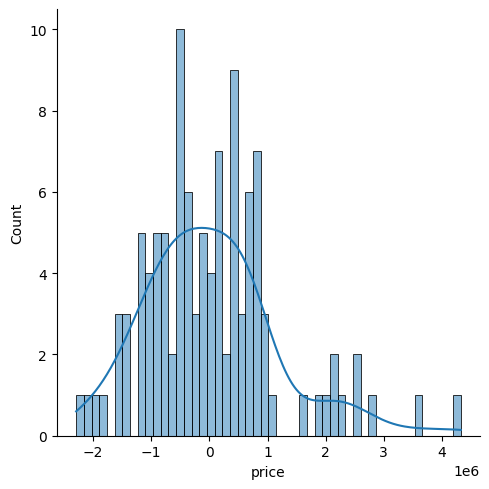

In [ ]:
sns.displot((y_test-prediction),bins=50,kde=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
r2 = r2_score(y_test,prediction)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R²): {r2}")


Mean Absolute Error (MAE): 868562.9021428595
Mean Squared Error (MSE): 1326423778648.9985
R-squared Score (R²): 0.6299632239810755
